In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA,KernelPCA 
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [18]:
mnist = fetch_openml("mnist_784")
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)
#[out] (70000, 784) (70000,)

(70000, 784) (70000,)


In [19]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))


Size of the dataframe: (70000, 786)


In [20]:
df.head( )

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9


In [58]:
df_k= df.sample(n=7000).copy( )

In [59]:
df_k.shape 

(7000, 789)

In [5]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [6]:
## get 三十个 随机的图片 

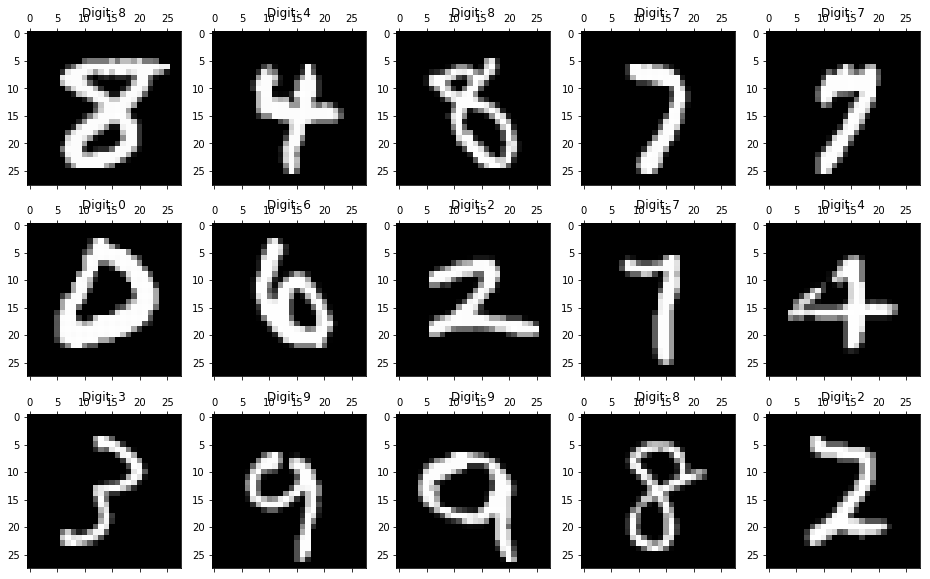

In [41]:
plt.gray()
fig = plt.figure( figsize=(16,10 ) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [42]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
#Explained variation per principal component: [0.09746116 0.07155445 0.06149531]

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


In [66]:
df_k.head( ) 

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel781,pixel782,pixel783,y,label,pca-one,pca-two,pca-three,kpca-one,kpca-two
31047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,0.753756,-1.082162,1.174346,-0.000202,-0.000202
65810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6,6,0.252377,0.433671,1.919416,-0.000202,-0.000202
1683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9,9,1.938859,3.058346,2.505493,-0.000202,-0.000202
22763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6,6,4.149850,-1.033773,2.935114,-0.000202,-0.000202
5855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7,7,-1.303849,2.508872,1.755538,-0.000202,-0.000202


In [74]:
#kpca = KernelPCA(kernel="rbf",  n_components=2,gamma= 0.0001      )
kpca = KernelPCA(kernel="poly",  n_components=10      )

kpca_result = kpca.fit_transform(df_k[feat_cols].values)
df_k['kpca-one'] = kpca_result[:,0]
df_k['kpca-two'] = kpca_result[:,1] 
#df_k['kpca-three'] = kpca_result[:,2]


In [21]:
# add three colomns to dataframe 

In [68]:
df_k.head( )

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel781,pixel782,pixel783,y,label,pca-one,pca-two,pca-three,kpca-one,kpca-two
31047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,0.753756,-1.082162,1.174346,-0.000789,-0.000185
65810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6,6,0.252377,0.433671,1.919416,-0.000789,-0.000185
1683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9,9,1.938859,3.058346,2.505493,-0.000789,-0.000185
22763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6,6,4.149850,-1.033773,2.935114,-0.000789,-0.000185
5855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7,7,-1.303849,2.508872,1.755538,-0.000789,-0.000185


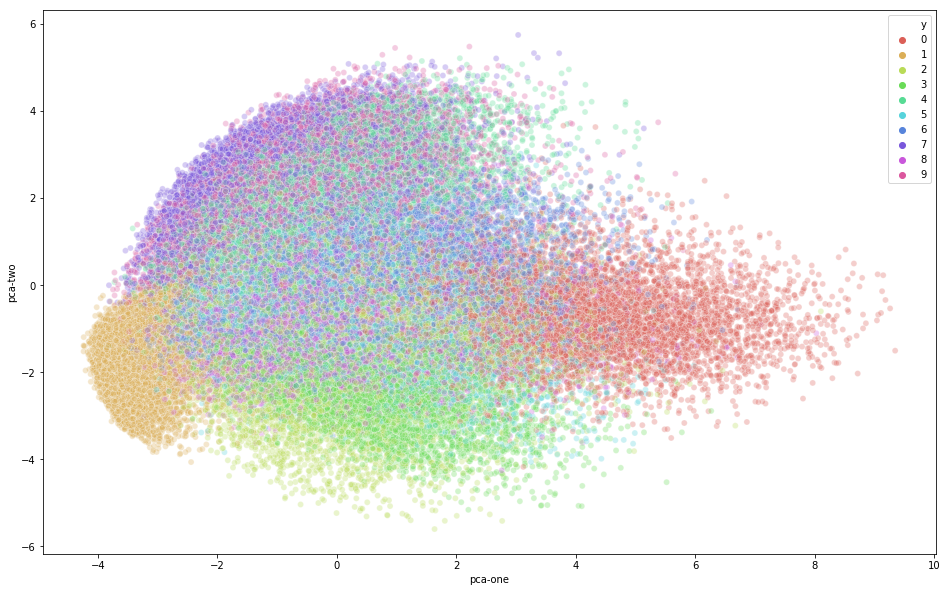

In [62]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

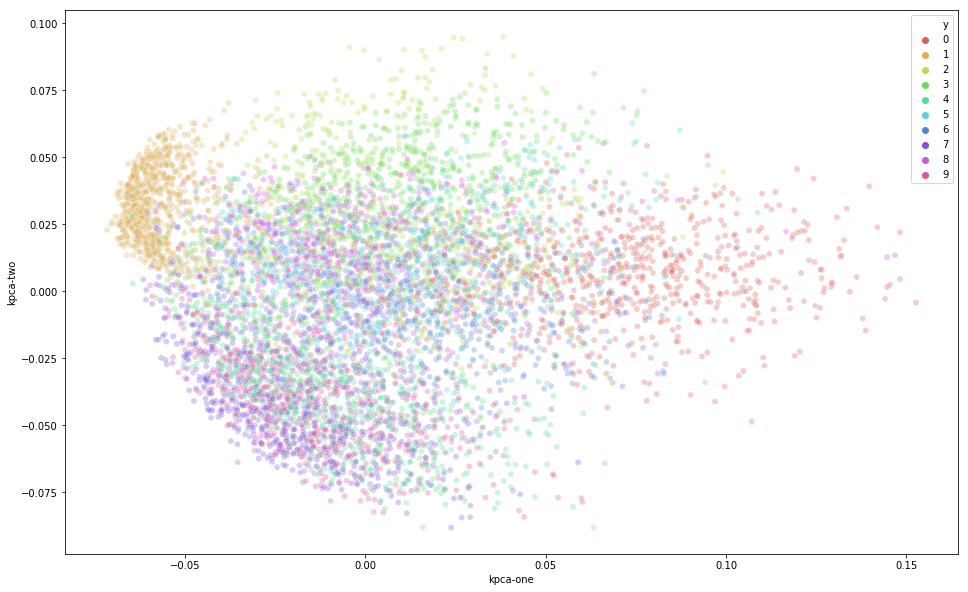

In [75]:
plt.figure(figsize=(16,10))
rndperm_k  = np.random.permutation(df_k.shape[0])
#print ( rndperm_k)
sns.scatterplot(
    x="kpca-one", y="kpca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_k.iloc[rndperm_k,:],
    legend="full",
    alpha=0.3
)